**Github link for this assignment** = https://github.com/STGT7/DMHR_assignment

# Assignment background

The NHS has been challenged to make “efficiency savings” and you have been commissioned by an NHS executive to review, document and assess GP prescribing costs. My assigned city of analysis is **Birmingham**.

# Assignment A

Using data from the HSCIC GP Practice Prescribing dataset for **Birmingham only**, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:

## A1. Identify all GP practices within Birmingham and produce a table with the total number of prescriptions and their total actual cost

In [1]:
#preliminaries
import pandas as pd
import numpy as np

%matplotlib inline
import random
from math import floor
import matplotlib.pyplot as plt

In [2]:
#import GP practice dataset for December 2015
cols1 = ['date', 'prac_code', 'prac_name', 'address_line1', 'address_line2', 'address_line3', 'address_line4', 'postcode']
prac = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv', header=None, index_col=False, names=cols1, skiprows=1)
prac.head() 

,date,prac_code,prac_name,address_line1,address_line2,address_line3,address_line4,postcode
0,201512,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
1,201512,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
2,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE
3,201512,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
4,201512,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AT


In [3]:
#import GP prescribing dataset for December 2015
cols2 = ['sha', 'pct', 'prac_code', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost', 'quantity', 'period']
prescrib = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv', header=None, names=cols2, index_col=False, skiprows=1)
prescrib.head()

,sha,pct,prac_code,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,Q44,RJN,Y05218,0501013K0AAAJAJ,Co-Amoxiclav_Tab 500mg/125mg,1,3.59,3.33,21,201512
1,Q44,RJN,Y05218,0501130R0AAAAAA,Nitrofurantoin_Cap 50mg,1,14.39,13.42,28,201512
2,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,1,0.51,0.58,14,201512
3,Q44,RTV,Y04937,0401020P0AAABAB,Lorazepam_Tab 1mg,1,2.65,2.46,28,201512
4,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,2,2.01,2.08,84,201512


In [96]:
#find Birmingham GP practices using the Birmingham postcodes as an identifier
birmingham = prac['postcode'].str.match("^[B][0-9]+\s") 
prac_birmingham = prac[birmingham]
prac_birmingham.head()

,date,prac_code,prac_name,address_line1,address_line2,address_line3,address_line4,postcode
4957,201512,M81001,ST STEPHENS SURGERY,ST STEPHENS SURGERY,ADELAIDE STREET,REDDITCH,WORCESTERSHIRE,B97 4AL
4958,201512,M81002,ELGAR HOUSE,ELGAR HOUSE,CHURCH ROAD,REDDITCH,WORCESTERSHIRE,B97 4AB
4975,201512,M81019,WINYATES HEALTH CENTRE,WINYATES HEALTH CENTRE,WINYATES WAY,REDDITCH,WORCESTERSHIRE,B98 0NR
4976,201512,M81020,THE DOW SURGERY,THE DOW SURGERY,WILLIAM STREET,REDDITCH,WORCESTERSHIRE,B97 4AJ
4977,201512,M81021,NEW ROAD SURGERY BROMSGROVE,NEW ROAD SURGERY,46 NEW ROAD,BROMSGROVE,WORCESTERSHIRE,B60 2JS


In [97]:
#find prescribing data for GP practices in Birmingham
prescrib_birmingham = pd.merge(prac_birmingham, prescrib, on=['prac_code'])
prescrib_birmingham.head()

,date,prac_code,prac_name,address_line1,address_line2,address_line3,address_line4,postcode,sha,pct,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,201512,M81001,ST STEPHENS SURGERY,ST STEPHENS SURGERY,ADELAIDE STREET,REDDITCH,WORCESTERSHIRE,B97 4AL,Q53,05J,0101010G0BBABAB,Maalox_Susp 195mg/220mg/5ml S/F,2,10.05,9.32,1500,201512
1,201512,M81001,ST STEPHENS SURGERY,ST STEPHENS SURGERY,ADELAIDE STREET,REDDITCH,WORCESTERSHIRE,B97 4AL,Q53,05J,0101010L0BEAAAI,Maalox Plus_Susp S/F,2,7.80,7.24,1000,201512
2,201512,M81001,ST STEPHENS SURGERY,ST STEPHENS SURGERY,ADELAIDE STREET,REDDITCH,WORCESTERSHIRE,B97 4AL,Q53,05J,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,5,12.30,11.84,1200,201512
3,201512,M81001,ST STEPHENS SURGERY,ST STEPHENS SURGERY,ADELAIDE STREET,REDDITCH,WORCESTERSHIRE,B97 4AL,Q53,05J,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,3.07,2.85,60,201512
4,201512,M81001,ST STEPHENS SURGERY,ST STEPHENS SURGERY,ADELAIDE STREET,REDDITCH,WORCESTERSHIRE,B97 4AL,Q53,05J,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,10,162.43,150.31,555,201512


In [98]:
#total number of prescriptions and their actual costs per practice for birmingham
prescrib_birmingham_sum = prescrib_birmingham.groupby('prac_code')['items','act_cost'].sum()
prescrib_birmingham_sum.head() 

,items,act_cost
prac_code,,
M81001,14916,150608.24
M81002,14142,149811.03
M81019,20114,216829.37
M81020,17535,169687.26
M81021,14619,149032.59


## A2. Find the top ten most/least frequently prescribed medications across all practices within Birmingham

In [99]:
#order by the total number of items prescribed per medication from largest to smallest
drug_totals = prescrib_birmingham.groupby('bnf_name')['items', 'act_cost'].sum()
most_frequent10 = drug_totals.nlargest(10, 'items')
most_frequent10

,items,act_cost
bnf_name,,
Paracet_Tab 500mg,64161,213086.11
Simvastatin_Tab 40mg,59587,86324.59
Omeprazole_Cap E/C 20mg,59013,96577.95
Aspirin Disper_Tab 75mg,57778,60404.34
Metformin HCl_Tab 500mg,49853,251335.67
Lansoprazole_Cap 30mg (E/C Gran),49123,92522.73
Amlodipine_Tab 5mg,44622,54193.68
Ventolin_Evohaler 100mcg (200 D),40841,80384.46
Bendroflumethiazide_Tab 2.5mg,35241,41510.33


In [100]:
least_frequent10 = drug_totals.nsmallest(10, 'items')
least_frequent10

,items,act_cost
bnf_name,,
365 Film 4cm x 5cm VP Adh Film Dress,1,0.09
365 Film 6cm x 7cm VP Adh Film Dress,1,0.14
AMI_Suportx Hernia Support Girdles Fle H,1,189.85
AMI_Suportx Ostomy & A/Support Ladies Br,1,54.65
AMI_Suportx Ostomy Support Mens Shorts D,1,45.37
Abilify_Orodisper Tab 10mg,1,88.82
Absorbent Cott Gz 90cm x 5m Ster,1,20.60
Absorbent Cott Wool HQ 500g,1,3.52
Acapella Oscillating Positive Expiratory,1,37.46


In [101]:
one_item = drug_totals[drug_totals['items'] == 1]
one_item #important to recognise in Birmingham there are potentially 1930 different presctiptions with an item number of 1

,items,act_cost
bnf_name,,
365 Film 4cm x 5cm VP Adh Film Dress,1,0.09
365 Film 6cm x 7cm VP Adh Film Dress,1,0.14
AMI_Suportx Hernia Support Girdles Fle H,1,189.85
AMI_Suportx Ostomy & A/Support Ladies Br,1,54.65
AMI_Suportx Ostomy Support Mens Shorts D,1,45.37
Abilify_Orodisper Tab 10mg,1,88.82
Absorbent Cott Gz 90cm x 5m Ster,1,20.60
Absorbent Cott Wool HQ 500g,1,3.52
Acapella Oscillating Positive Expiratory,1,37.46


## A2. What is their total actual cost (most and least frequently prescribed) and how does that compare to the overall actual costs of each practice and of the entire city?

In [102]:
most_frequent10_sum = most_frequent10['act_cost'].sum()
least_frequent10_sum = least_frequent10['act_cost'].sum()

print('The total cost (£) of the 10 most frequently prescribed medications in Birmingham = ' + str("%.2f" % most_frequent10_sum))
print('The total cost (£) of the 10 least frequently prescribed medications in Birmingham = ' + str("%.2f" % least_frequent10_sum))

The total cost (£) of the 10 most frequently prescribed medications in Birmingham = 1035776.71
The total cost (£) of the 10 least frequently prescribed medications in Birmingham = 941.49


In [103]:
#the overall actual costs for each practice in Birmingham
prac_drug_totals = prescrib_birmingham.groupby('prac_code')['act_cost'].sum()
prac_drug_totals = prac_drug_totals.to_frame()
prac_drug_totals.head()

,act_cost
prac_code,
M81001,150608.24
M81002,149811.03
M81019,216829.37
M81020,169687.26
M81021,149032.59


In [104]:
#comparing the most and least frequently prescribed medications to the total costs of each practice
prac_drug_totals['comparison_most_frequent10 (%)'] = most_frequent10_sum / prac_drug_totals['act_cost'] * 100
prac_drug_totals['comparison_least_frequent10 (%)'] = least_frequent10_sum / prac_drug_totals['act_cost'] * 100
prac_drug_totals.head()

,act_cost,comparison_most_frequent10 (%),comparison_least_frequent10 (%)
prac_code,,,
M81001,150608.24,687.729111,0.625125
M81002,149811.03,691.388818,0.628452
M81019,216829.37,477.692072,0.434208
M81020,169687.26,610.403344,0.554838
M81021,149032.59,695.000141,0.631734


In [105]:
#comparing the most and least frequently prescribed medications to the total actual costs for the entire city
prescrib_birmingham_totalsum = prescrib_birmingham['act_cost'].sum()

comparison_city_most_frequent10 = most_frequent10_sum / prescrib_birmingham_totalsum * 100
comparison_city_least_frequent10 = least_frequent10_sum / prescrib_birmingham_totalsum * 100

print('The sum of the most frequent 10 drugs is ' + str('%s' % float('%.2g' % comparison_city_most_frequent10)) + '% ' + 'of the overall actual cost of the city')
print('The sum of the least frequent 10 drugs is ' + str('%s' % float('%.2g' % comparison_city_least_frequent10)) + '% ' + 'of the overall actual cost of the city') 

The sum of the most frequent 10 drugs is 3.7% of the overall actual cost of the city
The sum of the least frequent 10 drugs is 0.0033% of the overall actual cost of the city


## A3. Find the top ten most expensive medications and calculate their total actual cost

In [106]:
#find the top 10 most expensive medications by ordering on the net ingredient cost (NIC) and therefore the basic price of the drug
drug_expense = prescrib_birmingham.groupby('bnf_name')['nic', 'act_cost'].max()
most_expense10 = drug_expense.nlargest(10, 'nic')
most_expense10 

,nic,act_cost
bnf_name,,
Methadone HCl_Mix 1mg/1ml S/F,24899.76,23520.75
Seretide 250_Evohaler 250mcg/25mcg(120D),17487.12,16172.17
KerraMaxCare 20cm x 30cm Wound Dress Pro,13860.81,12818.36
Influenza_Vac Inact 0.5ml Pfs,13489.73,12473.26
Etanercept_Inj 50mg/ml 1ml Pf Pen,12870.00,11900.32
Nurse It Ster Dress Pack,12711.60,11771.98
Adalimumab_Inj 40mg/0.8ml Pf Pen,12677.04,11721.89
Melatonin_Oral Soln 5mg/5ml,11313.17,10474.48
Trientine Dihydroch_Cap 300mg (Old),11176.00,10333.90


## A4. How does prescribing (frequency and costs) in Birmingham compare when using prescribing data from Cambridge as a reference? 

In [107]:
#find Cambridge GP practices
cambridge = prac['postcode'].str.startswith("CB")
prac_cambridge = prac[cambridge]
prac_cambridge.head()

,date,prac_code,prac_name,address_line1,address_line2,address_line3,address_line4,postcode
1534,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH
1535,201512,D81002,HUNTINGDON ROAD SURGERY,HUNTINGDON ROAD SURGERY,1 HUNTINGDON ROAD,CAMBRIDGE,,CB3 0DB
1536,201512,D81003,YORK STREET MEDICAL PRACTICE,YORK STREET MED PRACT.,146-148 YORK STREET,CAMBRIDGE,CAMRIDGESHIRE,CB1 2PY
1538,201512,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,WORDSWORTH GROVE,CAMBRIDGE,CAMBRIDGESHIRE,CB3 9HS
1541,201512,D81009,SHELFORD MEDICAL PRACTICE,SHELFORD MEDICAL PRACTICE,ASHEN GREEN GRT SHELFORD,CAMBRIDGE,,CB22 5FY


In [108]:
#find Cambridge GP practice prescribing data
prescrib_cambridge = pd.merge(prac_cambridge, prescrib, on=['prac_code'])
prescrib_cambridge.head()

,date,prac_code,prac_name,address_line1,address_line2,address_line3,address_line4,postcode,sha,pct,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH,Q56,06H,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,5,9.99,9.31,2050,201512
1,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH,Q56,06H,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,5,35.23,33.05,3440,201512
2,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH,Q56,06H,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,2,14.43,13.47,1150,201512
3,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH,Q56,06H,0101021B0BEAFAH,Gaviscon_Liq Relief Peppermint,1,7.11,6.59,600,201512
4,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH,Q56,06H,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),2,10.24,9.50,1000,201512


In [109]:
#The number of prescriptions and total actual costs of prescriptions per Cambridge GP practices
cam_pract_drug_totals2 = prescrib_cambridge.groupby('prac_code')['items', 'act_cost'].sum()
birmingham_pract_drug_totals2 = prescrib_birmingham.groupby('prac_code')['items','act_cost'].sum()
cam_pract_drug_totals2.head()

,items,act_cost
prac_code,,
D81001,8233,74230.82
D81002,16532,121673.12
D81003,12858,101834.83
D81005,6450,70439.91
D81009,10787,85895.67


In [110]:
#The number of prescriptions and total actual costs of prescriptions per Birmingham practices
birmingham_pract_drug_totals2.head()

,items,act_cost
prac_code,,
M81001,14916,150608.24
M81002,14142,149811.03
M81019,20114,216829.37
M81020,17535,169687.26
M81021,14619,149032.59


In [111]:
cam_pract_drug_totals2['items'].count()

61

In [112]:
birmingham_pract_drug_totals2['items'].count()

431

In [113]:
birmingham_pract_drug_totals2['items'].count() / cam_pract_drug_totals2['items'].count() 
#needs to be kept in mind that Birmigham has 7 times as much practices as cambridge 

7.0655737704918034

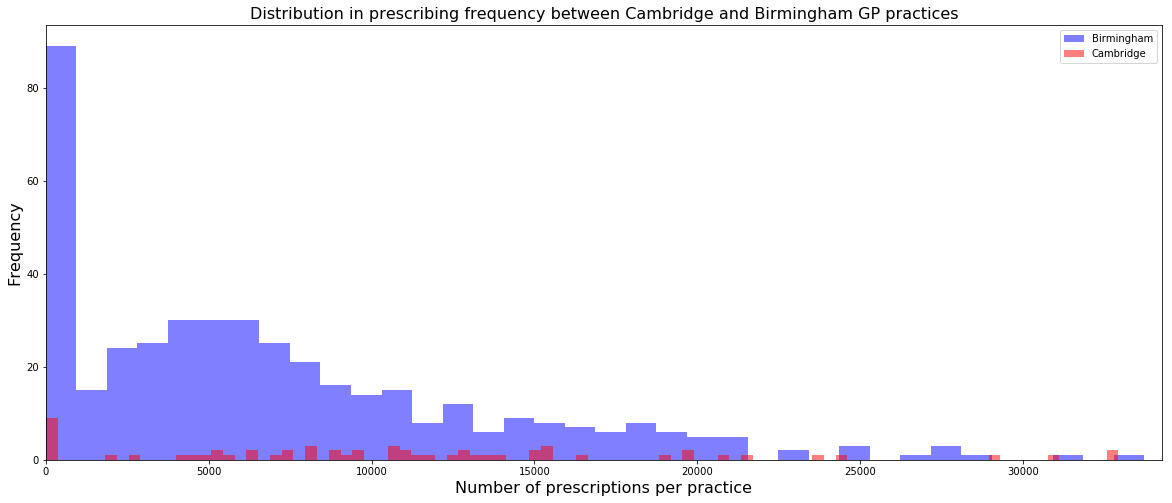

In [114]:
#comparing number of prescriptions *per practice* between Cambridge and Birmingham
cam = cam_pract_drug_totals2['items']
bir = birmingham_pract_drug_totals2['items']

plt.hist(bir, bins=100, alpha=0.5, label='Birmingham', color='blue')
plt.hist(cam, bins=100, alpha=0.5, label='Cambridge', color='red')

plt.title("Distribution in prescribing frequency between Cambridge and Birmingham GP practices", fontsize=16)
plt.xlabel("Number of prescriptions per practice", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

plt.gcf().set_size_inches(20,8)
min_x = floor(bir.quantile(.01))
max_x = floor(bir.quantile(.99))
plt.xlim(min_x, max_x) #do not show outliers
plt.legend(loc='upper right')

plt.show()

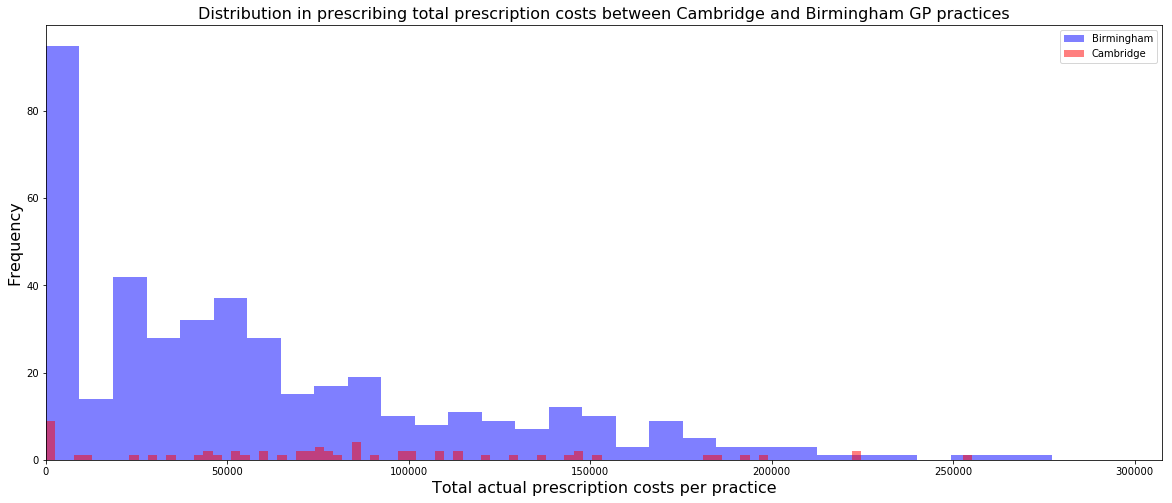

In [115]:
#comparing total actual costs for prescriptions *per practice* between Cambridge and Birmingham
cam = cam_pract_drug_totals2['act_cost']
bir = birmingham_pract_drug_totals2['act_cost']

plt.hist(bir, bins=100, alpha=0.5, label='Birmingham', color='blue')
plt.hist(cam, bins=100, alpha=0.5, label='Cambridge', color='red')

plt.title("Distribution in prescribing total prescription costs between Cambridge and Birmingham GP practices", fontsize=16)
plt.xlabel("Total actual prescription costs per practice", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

plt.gcf().set_size_inches(20,8)
min_x = floor(bir.quantile(.01))
max_x = floor(bir.quantile(.99))
plt.xlim(min_x, max_x) #do not show outliers
plt.legend(loc='upper right')

plt.show()

In [116]:
#identify prescribing (frequency and costs) *per medication* between Cambridge and Birmingham
cam_pract_drug_totals = prescrib_cambridge.groupby('bnf_name')['items', 'act_cost'].sum()
birmingham_pract_drug_totals = prescrib_birmingham.groupby('bnf_name')['items','act_cost'].sum() 

In [117]:
#identifying the differences in frequency and in turn spend on medication between Cambridge and Birmingham
compairson_frame = pd.merge(cam_pract_drug_totals, birmingham_pract_drug_totals, how='inner', left_index=True, right_index=True) 
compairson_frame.columns = ['items_cambridge', 'act_cost_cambridge', 'items_birmingham', 'act_cost_birmingham']
compairson_frame.head()

,items_cambridge,act_cost_cambridge,items_birmingham,act_cost_birmingham
bnf_name,,,,
3m Health Care_Cavilon Durable Barrier C,713,5538.75,4796,43147.46
3m Health Care_Cavilon No Sting 1ml Barr,37,642.90,415,5941.31
3m Health Care_Cavilon No Sting 3ml Barr,7,237.62,124,2607.39
3m Health Care_Cavilon No Sting Barrier,99,989.73,471,5419.06
4Head_Top Headache Relief Stick,1,13.70,3,17.14


In [118]:
#ratio of cambridge to brimingham 
compairson_frame['items_ratio'] = compairson_frame['items_cambridge'] / compairson_frame['items_birmingham']
compairson_frame['act_cost_ratio'] = compairson_frame['act_cost_cambridge'] / compairson_frame['act_cost_birmingham'] 
compairson_frame.head()

,items_cambridge,act_cost_cambridge,items_birmingham,act_cost_birmingham,items_ratio,act_cost_ratio
bnf_name,,,,,,
3m Health Care_Cavilon Durable Barrier C,713,5538.75,4796,43147.46,0.148666,0.128368
3m Health Care_Cavilon No Sting 1ml Barr,37,642.90,415,5941.31,0.089157,0.108208
3m Health Care_Cavilon No Sting 3ml Barr,7,237.62,124,2607.39,0.056452,0.091133
3m Health Care_Cavilon No Sting Barrier,99,989.73,471,5419.06,0.210191,0.182639
4Head_Top Headache Relief Stick,1,13.70,3,17.14,0.333333,0.799300


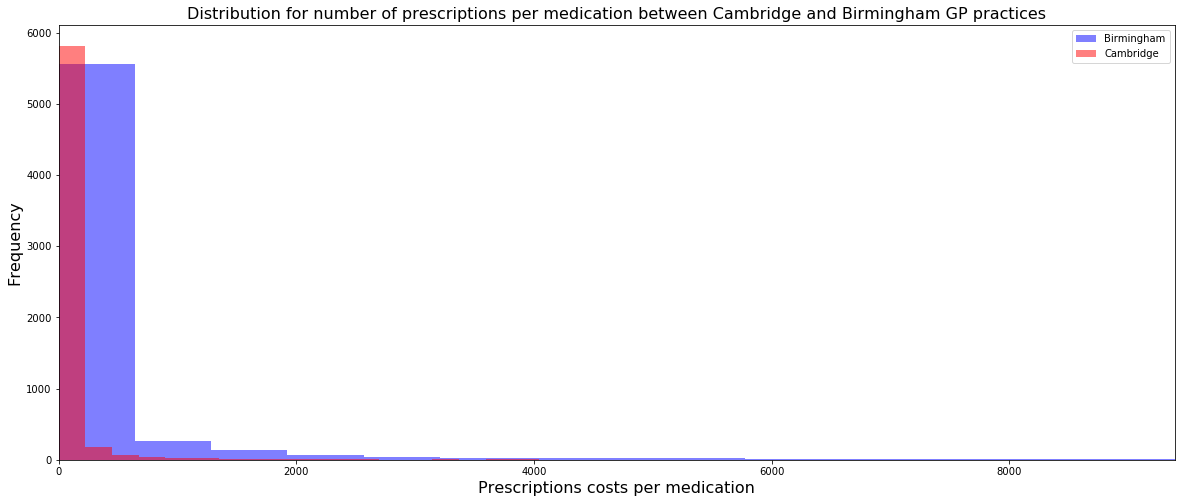

In [119]:
cam = compairson_frame['items_cambridge']
bir = compairson_frame['items_birmingham']

plt.hist(bir, bins=100, alpha=0.5, label='Birmingham', color='blue')
plt.hist(cam, bins=100, alpha=0.5, label='Cambridge', color='red')

plt.title("Distribution for number of prescriptions per medication between Cambridge and Birmingham GP practices", fontsize=16)
plt.xlabel("Prescriptions costs per medication", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

plt.gcf().set_size_inches(20,8)
min_x = floor(bir.quantile(.01))
max_x = floor(bir.quantile(.99))
plt.xlim(min_x, max_x) #do not show outliers
plt.legend(loc='upper right')

plt.show()

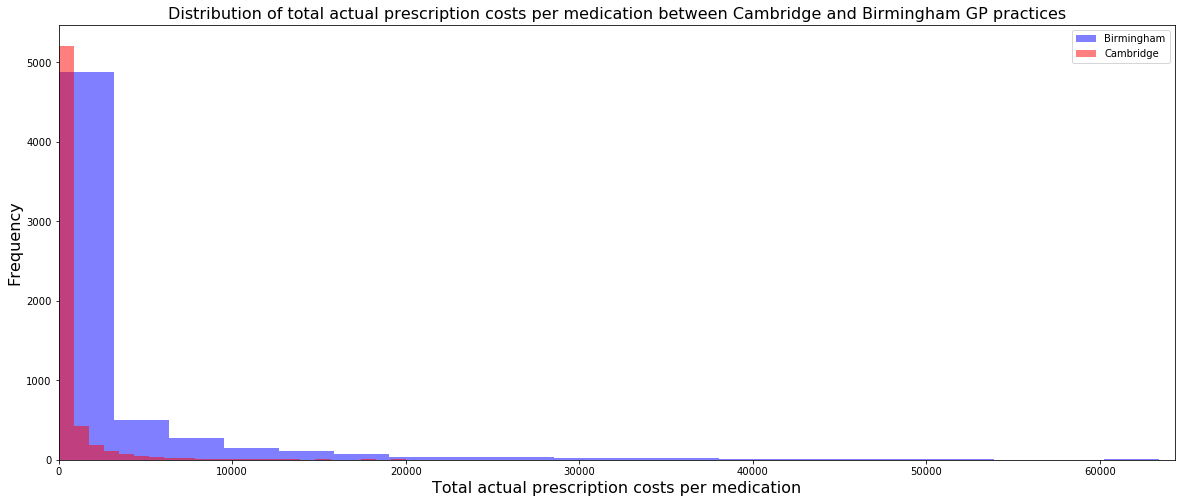

In [120]:
#comparing total actua costs *per medication* between Cambridge and Birmingham
cam = compairson_frame['act_cost_cambridge']
bir = compairson_frame['act_cost_birmingham']

plt.hist(bir, bins=100, alpha=0.5, label='Birmingham', color='blue')
plt.hist(cam, bins=100, alpha=0.5, label='Cambridge', color='red')

plt.title("Distribution of total actual prescription costs per medication between Cambridge and Birmingham GP practices", fontsize=16)
plt.xlabel("Total actual prescription costs per medication", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

plt.gcf().set_size_inches(20,8)
min_x = floor(bir.quantile(.01))
max_x = floor(bir.quantile(.99))
plt.xlim(min_x, max_x) #do not show outliers
plt.legend(loc='upper right')

plt.show()

## A5. Using pandasql, produce a table that provides the number of GP practices per city, ordered in descending order

In [121]:
!pip install pandasql
from pandasql import PandaSQL
pdsql = PandaSQL()

In [122]:
print(pdsql("SELECT address_line3, count(prac_code)\
        FROM prac\
        GROUP BY address_line3\
        ORDER BY count(prac_code) DESC\
        LIMIT 11")) #recognise that we are missing city labels form 339 practices within the dataset

                address_line3  count(prac_code)
0                                           339
1   BIRMINGHAM                              173
2   LIVERPOOL                               137
3   LEEDS                                   122
4   MANCHESTER                              117
5   SHEFFIELD                               105
6   BRISTOL                                  95
7   COVENTRY                                 95
8   LONDON                                   92
9   BRADFORD                                 85
10  LEICESTER                                84


In [123]:
print(pdsql("SELECT address_line4, count(prac_code)\
        FROM prac\
        GROUP BY address_line4\
        ORDER BY count(prac_code) DESC\
        LIMIT 11")) #recognise that we are missing region labels from 2080 practices within the dataset

                address_line4  count(prac_code)
0                                          2080
1   LONDON                                  869
2   ESSEX                                   410
3   KENT                                    398
4   LANCASHIRE                              339
5   WEST MIDLANDS                           314
6   SURREY                                  278
7   MIDDLESEX                               245
8   WEST YORKSHIRE                          234
9   CHESHIRE                                213
10  HAMPSHIRE                               184


# Assignment B

Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistics:

## B1. Calculate the monthly total spending for each GP-practice

In [124]:
prescrib.head() #display the HSCIC GP Practice prescribing data for December 2015

,sha,pct,prac_code,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,Q44,RJN,Y05218,0501013K0AAAJAJ,Co-Amoxiclav_Tab 500mg/125mg,1,3.59,3.33,21,201512
1,Q44,RJN,Y05218,0501130R0AAAAAA,Nitrofurantoin_Cap 50mg,1,14.39,13.42,28,201512
2,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,1,0.51,0.58,14,201512
3,Q44,RTV,Y04937,0401020P0AAABAB,Lorazepam_Tab 1mg,1,2.65,2.46,28,201512
4,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,2,2.01,2.08,84,201512


In [125]:
#total prescription spend per practice for December 2015
precrib_total = prescrib.groupby('prac_code')['act_cost'].sum()
precrib_total = precrib_total.to_frame()
precrib_total.head() #Total spend for each GP-practice 

,act_cost
prac_code,
A81001,83220.57
A81002,333514.67
A81003,47977.16
A81004,147494.85
A81005,107669.51


## B2. Use the number of registered patients in each GP-practice to calculate the relative costs per patient

In [126]:
#import demographic dataset and identify number of registered patients in each GP practice
prac_dem = pd.read_csv('https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age', header=None, index_col=False, skiprows=1)
prac_dem_ = prac_dem.iloc[:,[0,8]]
prac_dem_total = prac_dem_.rename(index=str, columns={0: "prac_code", 8: "total_patients"})
prac_dem_total = prac_dem_total.set_index('prac_code')
prac_dem_total.head() 

,total_patients
prac_code,
A81001,4234
A81002,19691
A81003,3357
A81004,9151
A81005,7883


In [127]:
#merge with the total actual cost table for each practice above 
prescrib_dem = pd.merge(prac_dem_total, precrib_total, left_index=True, right_index=True)
prescrib_dem.head() 

,total_patients,act_cost
prac_code,,
A81001,4234,83220.57
A81002,19691,333514.67
A81003,3357,47977.16
A81004,9151,147494.85
A81005,7883,107669.51


In [128]:
#identify the relative costs for prescriptions per patient
prescrib_dem['relative_cost'] = prescrib_dem['act_cost'] / prescrib_dem['total_patients']
prescrib_dem.head() 

,total_patients,act_cost,relative_cost
prac_code,,,
A81001,4234,83220.57,19.655307
A81002,19691,333514.67,16.937417
A81003,3357,47977.16,14.291677
A81004,9151,147494.85,16.117894
A81005,7883,107669.51,13.658443


## B3. Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for Birmingham within the national scatterplot

In [129]:
#identify the relative cost per patient for Birmingham GP practices for the month December 2015
prescrib_dem_birmingham = pd.merge(prac_dem_total, prescrib_birmingham_sum[['act_cost']], left_index=True, right_index=True)
prescrib_dem_birmingham['relative_cost'] = prescrib_dem_birmingham['act_cost'] / prescrib_dem_birmingham['total_patients']
prescrib_dem_birmingham.head()

,total_patients,act_cost,relative_cost
prac_code,,,
M81001,10613,150608.24,14.190921
M81002,14637,149811.03,10.235091
M81019,16002,216829.37,13.550142
M81020,11384,169687.26,14.905768
M81021,12686,149032.59,11.747800


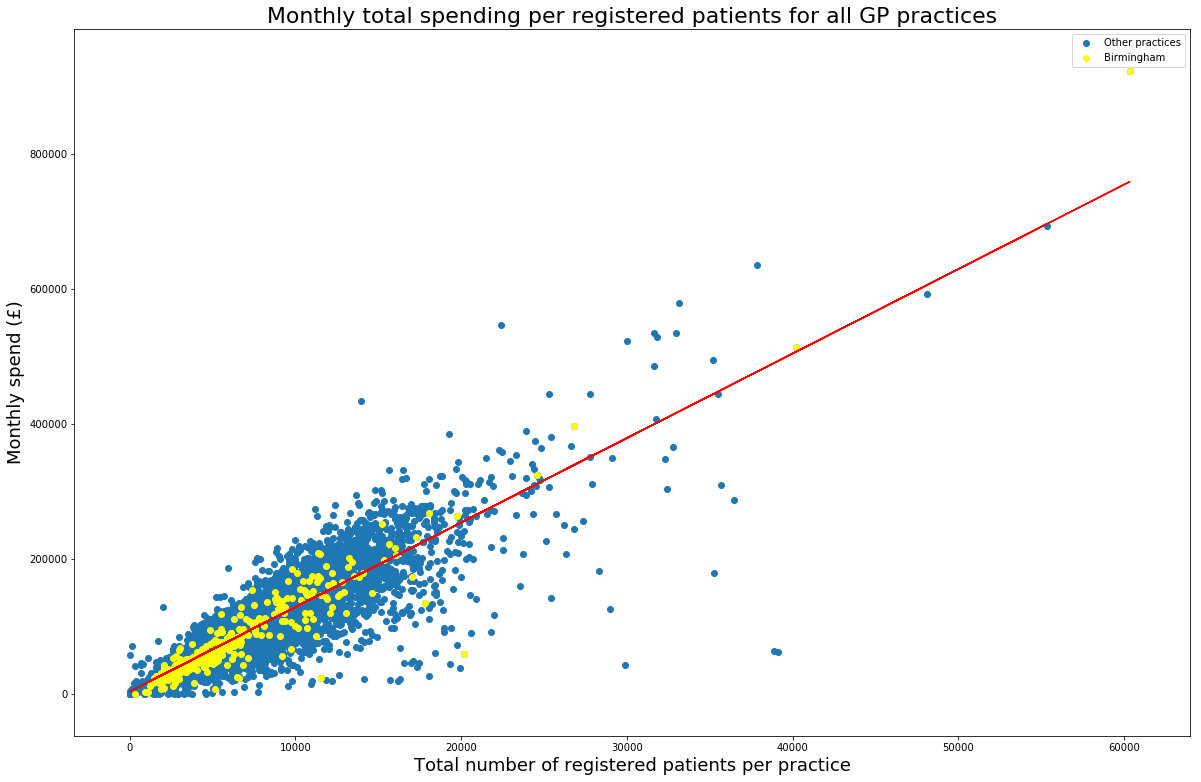

In [130]:
#monthly total spend per registered patients for all GP practices with the birmingham practices highlighted in Yellow
x = prescrib_dem['total_patients'].values
y = prescrib_dem['act_cost'].values

x1 = prescrib_dem_birmingham['total_patients'].values
y1 = prescrib_dem_birmingham['act_cost'].values

plt.scatter(x, y, label='Other practices')
plt.scatter(x1, y1, color='yellow', label='Birmingham')
plt.title("Monthly total spending per registered patients for all GP practices", fontsize=22)
plt.xlabel("Total number of registered patients per practice", fontsize=18)
plt.ylabel("Monthly spend (£)", fontsize=18)

plt.xlim()
plt.gcf().set_size_inches(20,13)
plt.legend(loc='upper right')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")

plt.show() 

## B4. Visualize the relative costs per patient of all national GP-practices in a histogram

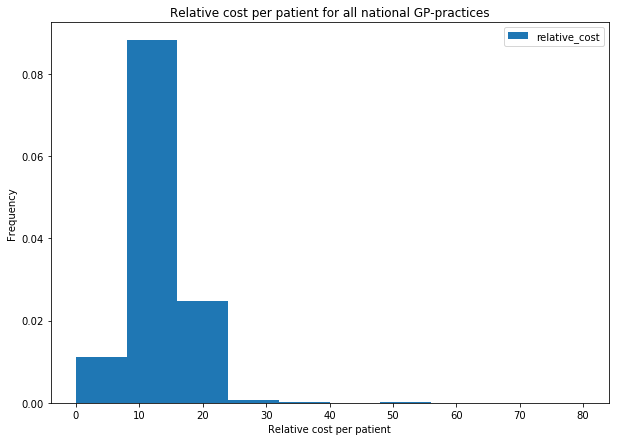

In [131]:
prescrib_dem.plot(y='relative_cost', title='Relative cost per patient for all national GP-practices',range=(0,80), kind='hist', normed=True)
plt.xlabel('Relative cost per patient')

plt.gcf().set_size_inches(10,7)
plt.show() 

## B5. Use descriptive statistics to show how your assigned city compares to the national level

In [132]:
prescrib_dem_birmingham['act_cost'].describe()

count       326.000000
mean      83752.322209
std       78289.017411
min         148.560000
25%       38002.842500
50%       59820.090000
75%      111883.445000
max      923786.260000
Name: act_cost, dtype: float64

In [133]:
prescrib_dem['act_cost'].describe()

count      7701.000000
mean      97573.645499
std       65787.154710
min           2.410000
25%       47714.240000
50%       84448.530000
75%      133552.730000
max      923786.260000
Name: act_cost, dtype: float64

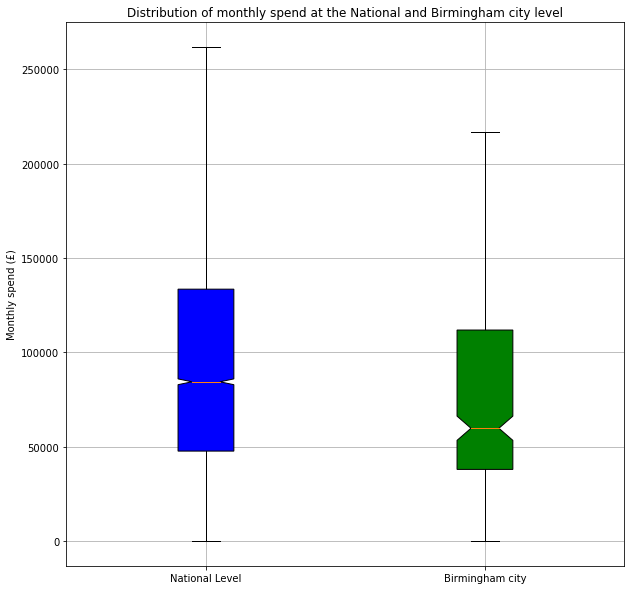

In [134]:
plot = plt.boxplot([prescrib_dem['act_cost'], prescrib_dem_birmingham['act_cost']], positions = [0,1], widths = 0.2, showfliers=False, notch=True, patch_artist=True)
plt.grid()
plt.xticks([0,1], ['National Level', 'Birmingham city'])
plt.ylabel('Monthly spend (£)')
plt.title('Distribution of monthly spend at the National and Birmingham city level')
plt.gcf().set_size_inches(10,10)

colors = ['blue', 'green']
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

# Assignment C

## C1. Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

In [136]:
#identifying all the statin drugs
statins = prescrib[prescrib['bnf_name'].str.contains('Simvastatin|Atorvastatin|Rosuvastatin|Pravastatin|Fluvastatin')]
statins.head() 

,sha,pct,prac_code,bnf_code,bnf_name,items,nic,act_cost,quantity,period
102,Q44,RXA,Y00327,0212000B0AAACAC,Atorvastatin_Tab 40mg,2,1.67,1.67,29,201512
103,Q44,RXA,Y00327,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.10,0.20,3,201512
647,Q44,RY7,N85638,0212000B0AAABAB,Atorvastatin_Tab 20mg,1,0.70,0.76,14,201512
648,Q44,RY7,N85638,0212000B0AAACAC,Atorvastatin_Tab 40mg,1,0.06,0.17,1,201512
650,Q44,RY7,N85638,0212000X0AAAAAA,Pravastatin Sod_Tab 10mg,1,0.29,0.38,7,201512


In [137]:
#the total cost per practice for these statins
statins_pracsum = statins.groupby('prac_code')['act_cost'].sum()
statins__pracsum = statins_pracsum.to_frame()
statins__pracsum.head()

,act_cost
prac_code,
A81001,1816.80
A81002,6513.51
A81003,868.39
A81004,2134.60
A81005,1887.11


In [138]:
#the total number of patients per practice as seen above
prescrib_dem_totalpatients = prescrib_dem[['total_patients']]
prescrib_dem_totalpatients.head()

,total_patients
prac_code,
A81001,4234
A81002,19691
A81003,3357
A81004,9151
A81005,7883


In [139]:
#merge both tables above on practice code 
statins__pracsum = pd.merge(prescrib_dem_totalpatients, statins__pracsum, left_index=True, right_index=True, suffixes=('', '_y'))
statins__pracsum.head()

,total_patients,act_cost
prac_code,,
A81001,4234,1816.80
A81002,19691,6513.51
A81003,3357,868.39
A81004,9151,2134.60
A81005,7883,1887.11


In [140]:
#relative cost per practice for these statins 
statins__pracsum['relative_cost'] = statins__pracsum['act_cost'] / statins__pracsum['total_patients']
statins__pracsum.head() 

,total_patients,act_cost,relative_cost
prac_code,,,
A81001,4234,1816.80,0.429098
A81002,19691,6513.51,0.330786
A81003,3357,868.39,0.258680
A81004,9151,2134.60,0.233264
A81005,7883,1887.11,0.239390


## C2. Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice from Birmingham

In [141]:
#import deprevation by postcode data and isolate the postcode, imd rank and imd decile columns 
imd = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv', header=None, index_col=False, skiprows=1)
imd = imd.iloc[:,[0,4,5]]
imd.columns = ['postcode', 'imd_rank','imd_decile']
imd.head()

,postcode,imd_rank,imd_decile
0,TS18 1HU,73.0,1.0
1,TS18 2AW,551.0,1.0
2,TS26 8DB,967.0,1.0
3,TS1 3BE,1914.0,1.0
4,TS14 7DJ,7082.0,3.0


In [142]:
#imd for each GP practice from Birmingham 
imd_birmingham = pd.merge(imd, prac_birmingham, on='postcode')
imd_birmingham.head()

,postcode,imd_rank,imd_decile,date,prac_code,prac_name,address_line1,address_line2,address_line3,address_line4
0,B97 4AL,6415.0,2.0,201512,M81001,ST STEPHENS SURGERY,ST STEPHENS SURGERY,ADELAIDE STREET,REDDITCH,WORCESTERSHIRE
1,B97 4AB,6415.0,2.0,201512,M81002,ELGAR HOUSE,ELGAR HOUSE,CHURCH ROAD,REDDITCH,WORCESTERSHIRE
2,B98 0NR,3684.0,2.0,201512,M81019,WINYATES HEALTH CENTRE,WINYATES HEALTH CENTRE,WINYATES WAY,REDDITCH,WORCESTERSHIRE
3,B97 4AJ,6415.0,2.0,201512,M81020,THE DOW SURGERY,THE DOW SURGERY,WILLIAM STREET,REDDITCH,WORCESTERSHIRE
4,B60 2JS,31474.0,10.0,201512,M81021,NEW ROAD SURGERY BROMSGROVE,NEW ROAD SURGERY,46 NEW ROAD,BROMSGROVE,WORCESTERSHIRE


## C3. Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile

In [143]:
#identify the imd for each GP practice by mergeing the imd and GP practice tables
imd_all_prac = pd.merge(imd, prac, on='postcode')
imd_all_prac.head()

,postcode,imd_rank,imd_decile,date,prac_code,prac_name,address_line1,address_line2,address_line3,address_line4
0,TS18 1HU,73.0,1.0,201512,A81025,THE DOVECOT SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND
1,TS18 1HU,73.0,1.0,201512,A81632,LAWSON STREET PRACTICE,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND
2,TS18 1HU,73.0,1.0,201512,Y04079,VIRGINCARE STOCKTON LLP(STOCKTON),LAWSON ST HEALTH CENTRE,LAWSON STREET,STOCKTON,CLEVELAND
3,TS18 1HU,73.0,1.0,201512,A81025,THE DOVECOT SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND
4,TS18 1HU,73.0,1.0,201512,A81632,LAWSON STREET PRACTICE,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND


In [144]:
#identify the imd for each GP practice along with their statin spend data
imd_all_statins = pd.merge(statins__pracsum.reset_index(), imd_all_prac, on='prac_code')
imd_all_statins = imd_all_statins.drop_duplicates(subset='prac_code', keep='first')
imd_all_statins.head()

,prac_code,total_patients,act_cost,relative_cost,postcode,imd_rank,imd_decile,date,prac_name,address_line1,address_line2,address_line3,address_line4
0,A81002,19691,6513.51,0.330786,TS18 2AW,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND
1,A81003,3357,868.39,0.258680,TS26 8DB,967.0,1.0,201512,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND
4,A81004,9151,2134.60,0.233264,TS1 3BE,1914.0,1.0,201512,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND
5,A81005,7883,1887.11,0.239390,TS14 7DJ,7082.0,3.0,201512,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,
7,A81006,12345,4074.99,0.330092,TS18 2AT,551.0,1.0,201512,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND


In [145]:
#sort the imd statin spend table from smallest to largest based on monthly spend (act_cost) for each individual practice 
imd_all_statins.sort_values(by=['act_cost']).head()

,prac_code,total_patients,act_cost,relative_cost,postcode,imd_rank,imd_decile,date,prac_name,address_line1,address_line2,address_line3,address_line4
2153,C84720,42,0.89,0.021190,NG7 2GW,10254.0,4.0,201512,NOTSPAR,484 DERBY ROAD,,NOTTINGHAM,
332,A83068,164,0.89,0.005427,SR8 4PF,6877.0,3.0,201512,JUPITER HOUSE SURGERY,JUPITER HOUSE SURGERY,SUNDERLAND RD HORDEN,PETERLEE,COUNTY DURHAM
10850,Y02988,325,1.06,0.003262,B44 0PU,980.0,1.0,201512,THE KINGSTANDING COMMUNITY PRACTICE,WARREN FARM HEALTH CENTRE,WARREN FARM ROAD,BIRMINGHAM,WEST MIDLANDS
4605,G81703,16,1.30,0.081250,TN34 1BA,398.0,1.0,201512,H&R P C SPECIAL SCHEME,STATION PLAZA HEALTH CTR,STATION APPROACH,HASTINGS,EAST SUSSEX
4823,G82651,1,2.06,2.060000,TN3 9PY,26873.0,9.0,201512,BURRSWOOD NURSING HOME,BURRSWOOD NURSING HOME,GROOMBRIDGE,TUNBRIDGE WELLS,KENT


In [146]:
#divide the sorted table into 10 deciles 
imd_all_statins['decile'] = pd.qcut(imd_all_statins['act_cost'], 10, labels=False)

lowest_spenders = imd_all_statins[ imd_all_statins.decile == 0]
highest_spenders = imd_all_statins[ imd_all_statins.decile == 9]

In [147]:
#first decile monthly spend on statins
lowest_spenders.head()

,prac_code,total_patients,act_cost,relative_cost,postcode,imd_rank,imd_decile,date,prac_name,address_line1,address_line2,address_line3,address_line4,decile
141,A81069,1389,352.17,0.253542,TS10 4NW,416.0,1.0,201512,RAINBOW SURGERY,REDCAR PRIMARY CARE HOSP,WEST DYKE ROAD,REDCAR,CLEVELAND,0
154,A81609,1363,368.26,0.270183,TS18 2AT,551.0,1.0,201512,A & B MEDICAL PRACTICE,THE SURGERY,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,0
166,A81621,2245,177.98,0.079278,TS3 9NB,376.0,1.0,201512,THORNTREE SURGERY,THORNTREE SURGERY,11 BERESFORD BUILDINGS,MIDDLESBROUGH,CLEVELAND,0
171,A81630,712,15.45,0.021699,TS5 4EQ,3207.0,1.0,201512,FULCRUM MEDICAL PRACTICE,FULCRUM MEDICAL PRACTICE,ACKLAM ROAD ACKLAM,MIDDLESBROUGH,,0
173,A81632,664,31.51,0.047455,TS18 1HU,73.0,1.0,201512,LAWSON STREET PRACTICE,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,0


In [148]:
#last decile monthly spend on statins
highest_spenders.head()

,prac_code,total_patients,act_cost,relative_cost,postcode,imd_rank,imd_decile,date,prac_name,address_line1,address_line2,address_line3,address_line4,decile
0,A81002,19691,6513.51,0.330786,TS18 2AW,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,9
7,A81006,12345,4074.99,0.330092,TS18 2AT,551.0,1.0,201512,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,9
37,A81017,20746,4339.35,0.209166,TS17 0EE,1122.0,1.0,201512,WOODBRIDGE PRACTICE,THE HEALTH CENTRE,TRENCHARD AVE THORNABY,STOCKTON ON TEES,CLEVELAND,9
48,A81021,13189,4043.22,0.306560,TS6 6TD,664.0,1.0,201512,NORMANBY MEDICAL CENTRE,NORMANBY MEDICAL CENTRE,LOW GRANGE HV NORMANBY RD,MIDDLESBROUGH,CLEVELAND,9
67,A81030,12119,3509.43,0.289581,TS1 3RY,81.0,1.0,201512,BOROUGH ROAD & NUNTHORPE MEDICAL GROUP,167A BOROUGH ROAD,,MIDDLESBROUGH,,9


In [149]:
#lowest relative spenders of statin from the first decile 
lowest_relativespenders = lowest_spenders.nsmallest(10, 'relative_cost')
lowest_relativespenders

,prac_code,total_patients,act_cost,relative_cost,postcode,imd_rank,imd_decile,date,prac_name,address_line1,address_line2,address_line3,address_line4,decile
2384,C88627,29880,12.56,0.000420,S3 7QP,8743.0,3.0,201512,UNIVERSITY HEALTH SERVICE HEALTH CENTRE,UNIVERSITY HEALTH SERVICE,HEALTH CENTRE 53 GELL ST,SHEFFIELD,SOUTH YORKSHIRE,0
1443,B86110,39138,20.23,0.000517,LS2 9AE,8229.0,3.0,201512,LEEDS STUDENT MEDICAL PRACTICE,LEEDS STUDENT MED.PRACT.,4 BLENHEIM COURT,BLENHEIM WALK,LEEDS,0
10907,Y03671,3543,2.60,0.000734,SN5 5AN,23771.0,8.0,201512,SPARCELLS SURGERY,MIDWINTER CLOSE,PEATMOOR,SWINDON,WILTSHIRE,0
3568,E87768,10971,8.45,0.000770,WC2R 2LS,8764.0,3.0,201512,KINGS COLLEGE HEALTH CENTRE,KINGS COLLEGE HEALTH CTR,3RD FLR MACADAM BUILDING,SURREY STREET,LONDON,0
10043,P88633,3239,2.83,0.000874,SK5 7QU,5906.0,2.0,201512,SOUTH REDDISH MEDICAL CTR 1,SOUTH REDDISH MEDICAL CTR,REDDISH ROAD REDDISH,STOCKPORT,CHESHIRE,0
7316,M82612,2308,2.19,0.000949,TF3 2BH,10701.0,4.0,201512,HOLLIWELL PRACTICE,HOLLIWELL PRACTICE,DEERCOTE,HOLLINSWOOD TELFORD,SHROPSHIRE,0
8614,N81607,2676,2.85,0.001065,CH65 2ER,1869.0,1.0,201512,WESTMINSTER SURGERY,16-18 CHURCH PARADE,,ELLESMERE PORT,CHESHIRE,0
3844,F81720,3272,4.68,0.001430,SS11 8QS,28010.0,9.0,201512,SHOTGATE SURGERY,340 SOUTHEND ROAD,SHOTGATE,WICKFORD,ESSEX,0
9071,N85643,1779,2.66,0.001495,CH43 0TS,24142.0,8.0,201512,PRENTON MEDICAL CENTRE_MURUGESH V,PRENTON MEDICAL CENTRE,516-518 WOODCHURCH ROAD,PRENTON BIRKENHEAD,WIRRAL,0
10764,Y02795,2924,4.43,0.001515,M24 4EL,4453.0,2.0,201512,MIDDLETON HEALTH CENTRE,THE HEALTH CENTRE UNIT F1,MIDDLETON SHOPPING CENTRE,MIDDLETON,GREATER MANCHESTER,0


In [150]:
#lowest relative spenders of statin from the last decile 
highest_relativespenders = highest_spenders.nlargest(10, 'relative_cost')
highest_relativespenders.head()

,prac_code,total_patients,act_cost,relative_cost,postcode,imd_rank,imd_decile,date,prac_name,address_line1,address_line2,address_line3,address_line4,decile
5604,H84608,2026,4669.32,2.304699,TW9 1PX,24045.0,8.0,201512,SAYER (RICHMOND GREEN),RICHMOND GREEN MED.CTR.,19 THE GREEN,RICHMOND,SURREY,9
3796,F81633,3363,3299.53,0.981127,CO11 2HD,13898.0,5.0,201512,LAWFORD SURGERY,THE SURGERY,2 EDGEFIELD AVE LAWFORD,MANNINGTREE,ESSEX,9
7604,M84031,6702,6009.11,0.896614,CV23 0LU,19759.0,7.0,201512,REVEL SURGERY,THE SURGERY,BARR LANE BRINKLOW,RUGBY,WARWICKSHIRE,9
9479,P82020,4005,3344.75,0.835144,BL3 1JF,23116.0,8.0,201512,LITTLE LEVER HEALTH CENTRE 1,LITTLE LEVER HEALTH CTR,MYTHAM RD LITTLE LEVER,BOLTON,LANCASHIRE,9
7150,M81009,5877,4808.74,0.818230,HR2 0EU,15548.0,5.0,201512,GOLDEN VALLEY PRACTICE,THE SURGERY,EWYAS HAROLD,HEREFORD,HEREFORDSHIRE,9


## C3. Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer

In [151]:
lowest_spenders['imd_rank'].describe()

count      767.000000
mean     11031.169492
std       8755.328066
min         27.000000
25%       3735.000000
50%       8764.000000
75%      17416.000000
max      32327.000000
Name: imd_rank, dtype: float64

In [152]:
highest_spenders['imd_rank'].describe()

count      768.000000
mean     15856.899740
std       9263.586417
min         81.000000
25%       8453.250000
50%      15363.000000
75%      23731.250000
max      32796.000000
Name: imd_rank, dtype: float64

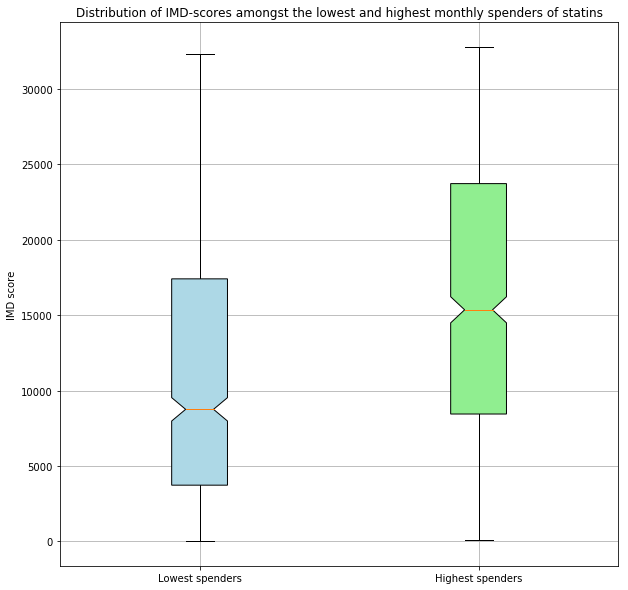

In [153]:
plot = plt.boxplot([lowest_spenders['imd_rank'].dropna(), highest_spenders['imd_rank']], positions = [0,1], widths = 0.2, notch=True, showfliers=False, patch_artist=True)
plt.grid()
plt.xticks([0,1], ['Lowest spenders', 'Highest spenders'])
plt.ylabel('IMD score')
plt.title('Distribution of IMD-scores amongst the lowest and highest monthly spenders of statins')
plt.gcf().set_size_inches(10,10)

colors = ['lightblue', 'lightgreen']
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

## C4. Identify for all GP-practices the associated nine English regions. Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015

In [154]:
#import Under 75 CVD mortality rates dataset
col3 = ['year', 'Period_of_coverage', 'Breakdown', 'Level', 'Level_description', 'Gender', 'Age', 'Indicator_value', 'Lower_CI', 'Upper_CI', 'Numerator', 'Denominator']
mortality = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv', header=None, index_col=False, names=col3, skiprows=1)
mortality.head()

,year,Period_of_coverage,Breakdown,Level,Level_description,Gender,Age,Indicator_value,Lower_CI,Upper_CI,Numerator,Denominator
0,2016,1/1/2016 to 31/12/2016,England,England,England,Person,All,72.7,71.9,73.5,"33,816","50,798,600"
1,2015,1/1/2015 to 31/12/2015,England,England,England,Person,All,74,73.3,74.8,"33,664","50,360,500"
2,2014,1/1/2014 to 31/12/2014,England,England,England,Person,All,73.8,73,74.6,"32,895","49,941,800"
3,2013,1/1/2013 to 31/12/2013,England,England,England,Person,All,76.6,75.7,77.4,"33,408","49,584,200"
4,2012,1/1/2012 to 31/12/2012,England,England,England,Person,All,77.7,76.8,78.5,"33,258","49,281,700"


In [155]:
#under 75 mortality rate data for CVD for year 2015
mortality = mortality[mortality['year'] == 2015]
mortality.head()

,year,Period_of_coverage,Breakdown,Level,Level_description,Gender,Age,Indicator_value,Lower_CI,Upper_CI,Numerator,Denominator
1,2015,1/1/2015 to 31/12/2015,England,England,England,Person,All,74,73.3,74.8,"33,664","50,360,500"
30,2015,1/1/2015 to 31/12/2015,England,England,England,Female,All,46.5,45.6,47.4,"10,835","25,186,400"
31,2015,1/1/2015 to 31/12/2015,England,England,England,Female,0 to 4,1.7,1.1,2.4,28,"1,674,300"
32,2015,1/1/2015 to 31/12/2015,England,England,England,Female,5 to 9,0.4,0.2,0.9,7,"1,638,600"
33,2015,1/1/2015 to 31/12/2015,England,England,England,Female,10 to 14,0.3,0.1,0.7,4,"1,465,100"


In [156]:
#under 75 mortality rate for CVD for year 2015 for each region
nine_regions = mortality.loc[(mortality['Breakdown'] == 'Region') & (mortality['Gender'] == 'Person') & (mortality['Breakdown'] == 'Region') & (mortality['Age'] == 'All')]
nine_regions = nine_regions[['year', 'Level_description', 'Indicator_value']]
nine_regions

,year,Level_description,Indicator_value
471,2015,East Midlands,76.7
472,2015,East of England,66.3
473,2015,London,76.7
474,2015,North East,86
475,2015,North West,88.3
476,2015,South East,60.8
477,2015,South West,64.5
478,2015,West Midlands,77.9
479,2015,Yorkshire and The Humber,82.8


## C5. Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases

In [74]:
#import ONS Postcode lookup 
cols4 = ['postcode_1', 'postcode_2', 'postcode', 'date_intro', 'user_type', 'Easting', 'Northing', 'Positional_Quality', 'County_Code', 'County_Name', 'Local_Authority_Code', 'Local_Authority_Name', 'Ward_Code', 'Ward_Name', 'Country_Code', 'Country_Name', 'Region_Code', 'Region_Name', 'Parliamentary_Constituency_Code', 'Parliamentary_Constituency_Name', 'European_Electoral_Region_Code', 'European_Electoral_Region_Name', 'Primary_Care_Trust_Code', 'Primary_Care_Trust_Name', 'Lower_Super_Output_Area_Code', 'Lower_Super_Output_Area_Name', 'Middle_Super_Output_Area_Code', 'Middle_Super_Output_Area_Name', 'Output Area Classification Code', 'Output_Area_Classification_Name', 'Longitude', 'Latitude', 'Spatial_Accuracy', 'Last_Uploaded', 'Location', 'Socrata_ID']
lookup = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv', header=None, index_col=False, skiprows=1, names=cols4)
lookup.head()

,postcode_1,postcode_2,postcode,date_intro,user_type,Easting,Northing,Positional_Quality,County_Code,County_Name,...,Middle_Super_Output_Area_Code,Middle_Super_Output_Area_Name,Output Area Classification Code,Output_Area_Classification_Name,Longitude,Latitude,Spatial_Accuracy,Last_Uploaded,Location,Socrata_ID
0,S20 6RU,S20 6RU,S20 6RU,06-1997,0,441432.0,382852.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02001671,NaN,6B3,Suburbanites;Semi-detached suburbia;Semi-detac...,-1.379193,53.340953,Postcode Level,21/09/2017,"(53.340953, -1.379193)",1311804
1,TW4 7BD,TW4 7BD,TW4 7BD,01-1980,0,512373.0,175453.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02000541,NaN,4B1,Multicultural metropolitans;Challenged Asian t...,-0.383652,51.466899,Postcode Level,21/09/2017,"(51.466899, -0.383652)",1630253
2,GU513ZQ,GU51 3ZQ,GU51 3ZQ,05-2003,1,481569.0,155037.0,1,E10000014,Hampshire,...,E02004757,NaN,6B4,Suburbanites;Semi-detached suburbia;Older work...,-0.831674,51.288637,Postcode Level,21/09/2017,"(51.288637, -0.831674)",652126
3,OX4 6BE,OX4 6BE,OX4 6BE,06-2000,0,455440.0,203036.0,1,E10000025,Oxfordshire,...,E02005956,NaN,4A1,Multicultural metropolitans;Rented family livi...,-1.198788,51.723313,Postcode Level,21/09/2017,"(51.723313, -1.198788)",1158807
4,TA7 9JH,TA7 9JH,TA7 9JH,01-1980,0,338745.0,139337.0,1,E10000027,Somerset,...,E02006072,NaN,1A2,Rural residents;Farming communities;Establishe...,-2.877144,51.149999,Postcode Level,21/09/2017,"(51.149999, -2.877144)",1547901


In [157]:
#a significant proportion of the postcodes have not been labelled with a Region Name so there is a considered level of missing data
lookup['Region_Name'].value_counts(dropna=False)

NaN                         308236
South East                  252297
North West                  194243
London                      181151
South West                  175687
East of England             164339
Yorkshire and The Humber    148294
West Midlands               142611
East Midlands               114829
North East                   74502
Name: Region_Name, dtype: int64

In [158]:
#for each postcode identify the lablelled region name
lookup_region = lookup[['postcode', 'Region_Name']]
lookup_region.head()

,postcode,Region_Name
0,S20 6RU,Yorkshire and The Humber
1,TW4 7BD,London
2,GU51 3ZQ,South East
3,OX4 6BE,South East
4,TA7 9JH,South West


In [159]:
#using the below function remove the spaces within the postcode for allow this table to be merge for the statins data
def remove_whitespace(x):
    x = "".join(x.split())
    return x

lookup_region.loc[:,'postcode'] = lookup_region.loc[:,'postcode'].apply(remove_whitespace)
lookup_region.head()

/Users/ivan/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,postcode,Region_Name
0,S206RU,Yorkshire and The Humber
1,TW47BD,London
2,GU513ZQ,South East
3,OX46BE,South East
4,TA79JH,South West


In [160]:
#remove the whitespace from the each row of the postcode column
imd_all_statins.loc[:, 'postcode'] = imd_all_statins['postcode'].apply(remove_whitespace)
imd_all_statins.head()

,prac_code,total_patients,act_cost,relative_cost,postcode,imd_rank,imd_decile,date,prac_name,address_line1,address_line2,address_line3,address_line4,decile
0,A81002,19691,6513.51,0.330786,TS182AW,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,9
1,A81003,3357,868.39,0.258680,TS268DB,967.0,1.0,201512,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,2
4,A81004,9151,2134.60,0.233264,TS13BE,1914.0,1.0,201512,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,7
5,A81005,7883,1887.11,0.239390,TS147DJ,7082.0,3.0,201512,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,6
7,A81006,12345,4074.99,0.330092,TS182AT,551.0,1.0,201512,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,9


In [161]:
#merge statin dataset and ONS potscode data on the matched postcodes
statin_region = pd.merge(imd_all_statins, lookup_region, on='postcode', how='inner')
statin_region.head()

,prac_code,total_patients,act_cost,relative_cost,postcode,imd_rank,imd_decile,date,prac_name,address_line1,address_line2,address_line3,address_line4,decile,Region_Name
0,A81002,19691,6513.51,0.330786,TS182AW,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,9,North East
1,A81003,3357,868.39,0.258680,TS268DB,967.0,1.0,201512,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,2,North East
2,A81060,5427,911.95,0.168039,TS268DB,967.0,1.0,201512,THE KOH PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,3,North East
3,A81613,3325,797.96,0.239988,TS268DB,967.0,1.0,201512,JOURNEE MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,2,North East
4,A81004,9151,2134.60,0.233264,TS13BE,1914.0,1.0,201512,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,7,North East


In [162]:
#identify monthly spend on statins for each region
statin_region_graph = statin_region.groupby('Region_Name')[['act_cost']].sum()
statin_region_graph = statin_region_graph.reset_index()
statin_region_graph 

,Region_Name,act_cost
0,East Midlands,1046465.23
1,East of England,1307315.80
2,London,1583620.25
3,North East,705289.00
4,North West,1860572.70
5,South East,2027032.00
6,South West,1332687.02
7,West Midlands,1404074.57
8,Yorkshire and The Humber,1439150.35


In [163]:
#merge under 75 mortality rate data with the monthly spend on statins for each region
statin_mortaility_region_graph = pd.merge(nine_regions, statin_region_graph, left_on='Level_description', right_on='Region_Name')
statin_mortaility_region_graph

,year,Level_description,Indicator_value,Region_Name,act_cost
0,2015,East Midlands,76.7,East Midlands,1046465.23
1,2015,East of England,66.3,East of England,1307315.80
2,2015,London,76.7,London,1583620.25
3,2015,North East,86,North East,705289.00
4,2015,North West,88.3,North West,1860572.70
5,2015,South East,60.8,South East,2027032.00
6,2015,South West,64.5,South West,1332687.02
7,2015,West Midlands,77.9,West Midlands,1404074.57
8,2015,Yorkshire and The Humber,82.8,Yorkshire and The Humber,1439150.35


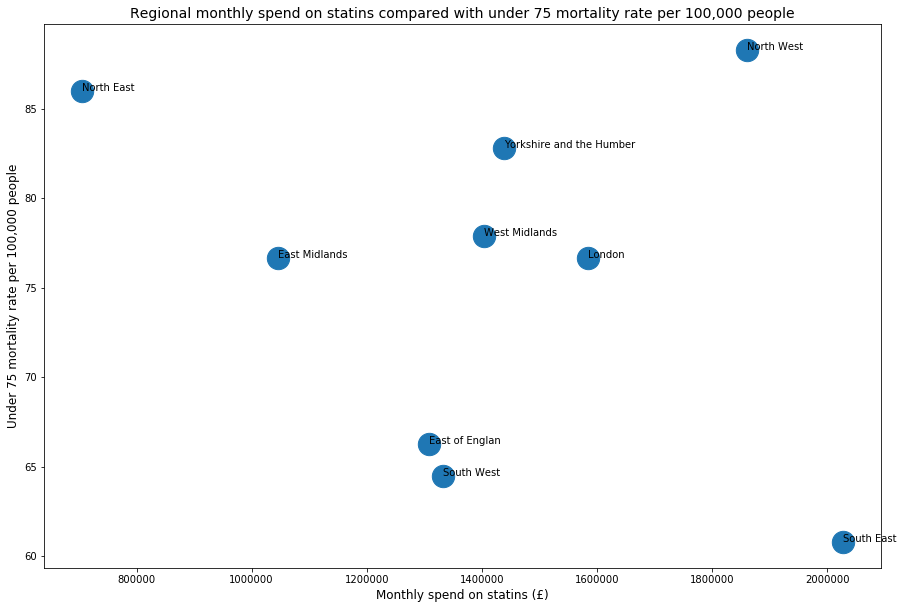

In [164]:
#visualise the monthly spend on statins compared with under 75 mortality rate per 100,000 people
x = statin_mortaility_region_graph['act_cost'].values
y = statin_mortaility_region_graph['Indicator_value'].values
n = ['East Midlands', 'East of Englan', 'London', 'North East', 'North West', 'South East', 'South West', 'West Midlands', 'Yorkshire and the Humber']

fig, ay = plt.subplots()
ay.scatter(x, y, s=500)

for i, txt in enumerate(n):
    ay.annotate(txt, (x[i],y[i]))
    
plt.title("Regional monthly spend on statins compared with under 75 mortality rate per 100,000 people", fontsize=14)
plt.xlabel("Monthly spend on statins (£)", fontsize=12)
plt.ylabel("Under 75 mortality rate per 100,000 people", fontsize=12)

plt.xlim()
plt.gcf().set_size_inches(15,10)  
    
plt.show()

# Assignment D

Using the Google FluTrends surveillance data, pick two random countries, one in the Northern hemisphere and one in the Southern hemisphere. For each of country:

##  Northern Hemisphere country = Canada

### D1. Provide a visualisation of the seasonal patterns across all years

In [165]:
url_can = 'https://www.google.org/flutrends/about/data/flu/ca/data.txt'

canadaFluTrends = pd.read_csv(url_can, sep=',', header = 8, parse_dates=True)
canadaFluTrends['Date'] = pd.to_datetime(canadaFluTrends['Date'])
canadaFluTrends.head()

,Date,Canada,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Saskatchewan,Quebec
0,2003-09-28,1280,NaN,1353,NaN,NaN,NaN,NaN,1349,NaN,960
1,2003-10-05,1339,2309.0,1161,1977.0,NaN,NaN,NaN,1323,NaN,1278
2,2003-10-12,1451,2615.0,1546,2313.0,NaN,NaN,NaN,1119,NaN,1344
3,2003-10-19,1593,2910.0,1813,1958.0,NaN,NaN,1805.0,1213,NaN,1377
4,2003-10-26,1895,4793.0,1883,1560.0,1600.0,NaN,1955.0,1492,3076.0,1138


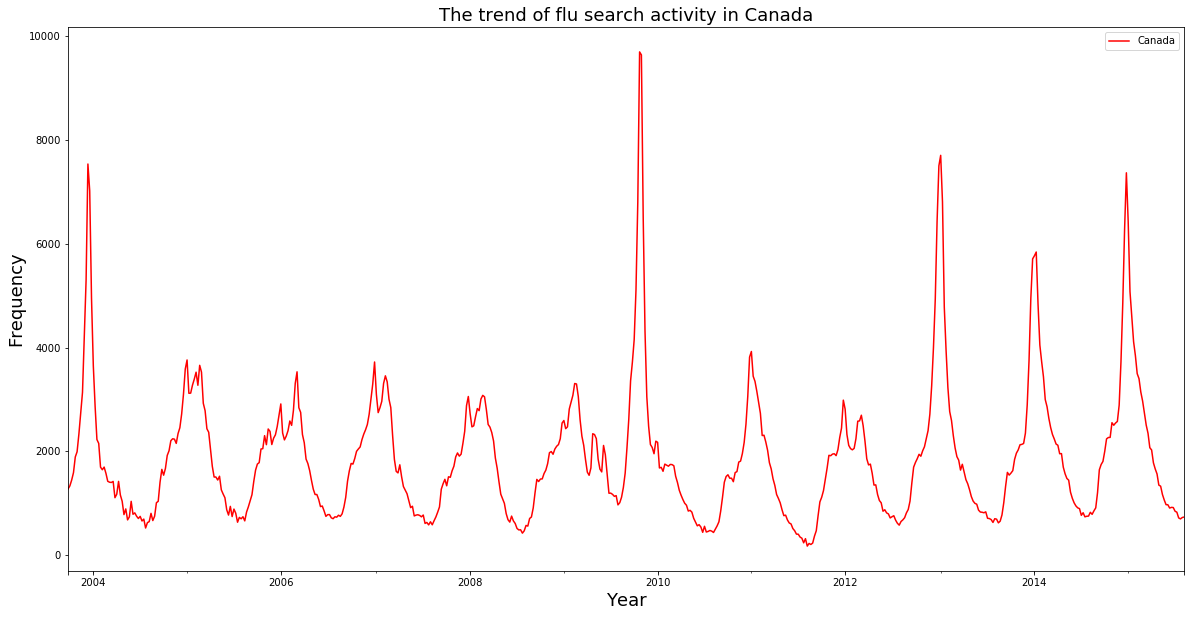

In [166]:
fig_au = canadaFluTrends.plot(x='Date', y='Canada', color='red', figsize=(20,10))
fig_au.set_title('The trend of flu search activity in Canada',fontsize=18)
fig_au.set_ylabel('Frequency',fontsize=18)
fig_au.set_xlabel('Year',fontsize=18)

### D2. Calculate the yearly minimum and maximum for each country

In [167]:
#make Date the index
canadaFluTrends1 = canadaFluTrends.set_index('Date', drop=True)
canadaFluTrends1.head()

,Canada,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Saskatchewan,Quebec
Date,,,,,,,,,,
2003-09-28,1280,NaN,1353,NaN,NaN,NaN,NaN,1349,NaN,960
2003-10-05,1339,2309.0,1161,1977.0,NaN,NaN,NaN,1323,NaN,1278
2003-10-12,1451,2615.0,1546,2313.0,NaN,NaN,NaN,1119,NaN,1344
2003-10-19,1593,2910.0,1813,1958.0,NaN,NaN,1805.0,1213,NaN,1377
2003-10-26,1895,4793.0,1883,1560.0,1600.0,NaN,1955.0,1492,3076.0,1138


In [168]:
#identify all the years in the Canadian dataset
year = canadaFluTrends1.index.strftime('%Y')

def remove_duplicates(l):
    z = list(set(l)) 
    n = sorted(z)
    return n

remove_duplicates(year)

['2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [170]:
#print the yearly minimum and maximum
can_years = remove_duplicates(year)

for val in can_years:
    df_year = canadaFluTrends1[val]
    
    max_val = df_year['Canada'].max()
    min_val = df_year['Canada'].min()
    
    print ('For the year: ' + str(val), '----', 'maximum = ' + str(max_val), 'minimum = ' + str(min_val))

For the year: 2003 ---- maximum = 7531 minimum = 1280
For the year: 2004 ---- maximum = 3649 minimum = 528
For the year: 2005 ---- maximum = 3761 minimum = 639
For the year: 2006 ---- maximum = 3722 minimum = 707
For the year: 2007 ---- maximum = 3456 minimum = 588
For the year: 2008 ---- maximum = 3080 minimum = 429
For the year: 2009 ---- maximum = 9688 minimum = 973
For the year: 2010 ---- maximum = 3816 minimum = 442
For the year: 2011 ---- maximum = 3924 minimum = 180
For the year: 2012 ---- maximum = 7496 minimum = 583
For the year: 2013 ---- maximum = 7698 minimum = 627
For the year: 2014 ---- maximum = 7362 minimum = 743
For the year: 2015 ---- maximum = 6428 minimum = 703


## Southern Hemisphere country = South Africa

### D1. Provide a visualisation of the seasonal patterns across all years

In [171]:
url_sa = 'https://www.google.org/flutrends/about/data/flu/za/data.txt'

#set header=8 to properly extract the data
southAfricaFluTrends = pd.read_csv(url_sa, sep=',', header = 8, parse_dates=True)
southAfricaFluTrends['Date'] = pd.to_datetime(southAfricaFluTrends['Date'])
southAfricaFluTrends.head()

,Date,South Africa,Gauteng,Kwazulu-Natal,Western Cape
0,2006-01-15,1835,NaN,NaN,NaN
1,2006-01-22,1866,2216.0,NaN,NaN
2,2006-01-29,1991,2081.0,NaN,1733.0
3,2006-02-05,2169,2136.0,NaN,1977.0
4,2006-02-12,1958,2047.0,NaN,2038.0


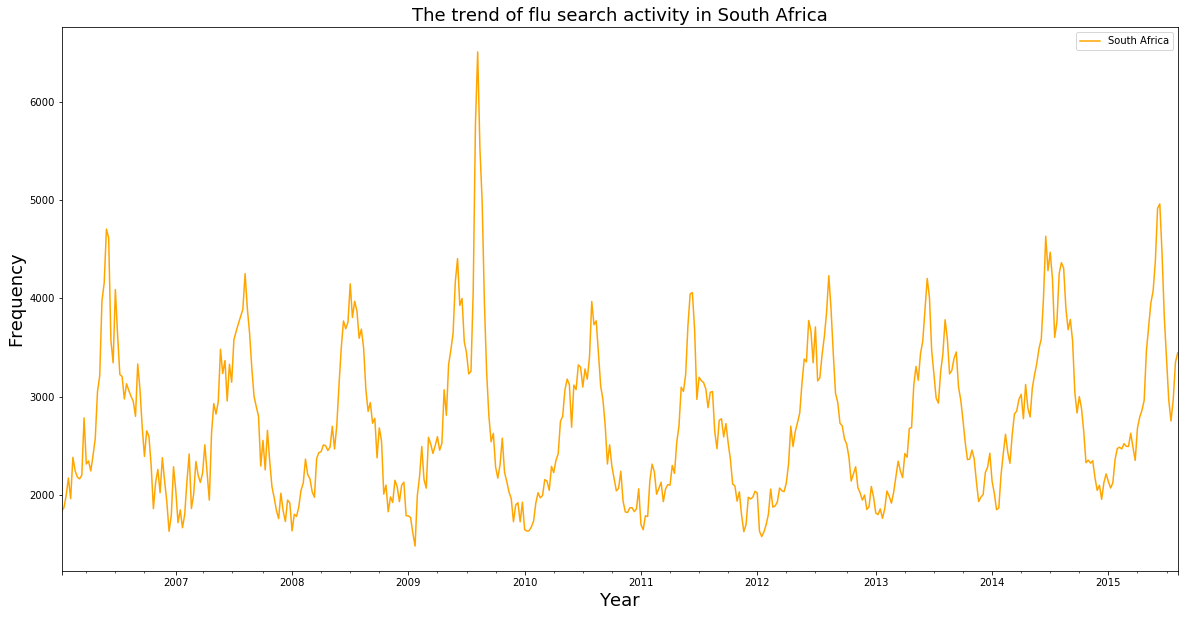

In [172]:
fig_au = southAfricaFluTrends.plot(x='Date', y='South Africa', color='orange', figsize=(20,10))
fig_au.set_title('The trend of flu search activity in South Africa',fontsize=18)
fig_au.set_ylabel('Frequency',fontsize=18)
fig_au.set_xlabel('Year',fontsize=18)

### D2. Calculate the yearly minimum and maximum for each country

In [173]:
#make Date the index
southAfricaFluTrends1 = southAfricaFluTrends.set_index('Date', drop=True)
southAfricaFluTrends1.head()

,South Africa,Gauteng,Kwazulu-Natal,Western Cape
Date,,,,
2006-01-15,1835,NaN,NaN,NaN
2006-01-22,1866,2216.0,NaN,NaN
2006-01-29,1991,2081.0,NaN,1733.0
2006-02-05,2169,2136.0,NaN,1977.0
2006-02-12,1958,2047.0,NaN,2038.0


In [174]:
#identify all the years in the South African dataset
year = southAfricaFluTrends1.index.strftime('%Y')

def remove_duplicates(l):
    z = list(set(l)) 
    n = sorted(z)
    return n

remove_duplicates(year)

['2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [175]:
#print the yearly minimum and maximum
sa_years = remove_duplicates(year)

for val in sa_years:
    df_year = southAfricaFluTrends1[val]
    
    max_val = df_year['South Africa'].max()
    min_val = df_year['South Africa'].min()
    
    print ('For the year: ' + str(val), '----', 'maximum = ' + str(max_val), 'minimum = ' + str(min_val))

For the year: 2006 ---- maximum = 4707 minimum = 1626
For the year: 2007 ---- maximum = 4253 minimum = 1662
For the year: 2008 ---- maximum = 4149 minimum = 1630
For the year: 2009 ---- maximum = 6514 minimum = 1475
For the year: 2010 ---- maximum = 3969 minimum = 1628
For the year: 2011 ---- maximum = 4060 minimum = 1622
For the year: 2012 ---- maximum = 4232 minimum = 1572
For the year: 2013 ---- maximum = 4204 minimum = 1758
For the year: 2014 ---- maximum = 4634 minimum = 1846
For the year: 2015 ---- maximum = 4964 minimum = 2067
